In [1]:
import os
import shutil
import matplotlib.colors as mcolors
import random
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np
import pydicom
import cv2

from tqdm import tqdm
from PIL import Image
from duke_dbt_data import dcmread_image
from typing import AnyStr, BinaryIO, Dict, List, NamedTuple, Optional, Union
from skimage.transform import resize
from skimage.exposure import rescale_intensity
from skimage.metrics import structural_similarity as ssim

In [4]:
# Definir la ruta de la carpeta
folder_path = "E:/Numpys/ArraySeleccionadas/Normal"
pathSave = "E:/Numpys/ArraysSelecionadasBien/Normal"

# Obtener la lista de archivos en la carpeta
files = os.listdir(folder_path)

for file in files:
    if file.endswith('.npy'):
        file_path = os.path.join(folder_path, file)
        file_Savepath = os.path.join(pathSave, file)
        
        array = np.load(file_path)
        array_expanded = np.expand_dims(array, axis=-1)
        np.save(file_Savepath, array_expanded)
        
print("Todas las imágenes han sido redimensionadas.")

Todas las imágenes han sido redimensionadas.


Forma del array cargado: (2, 720, 720)


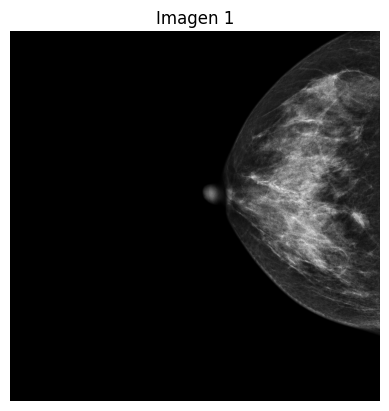

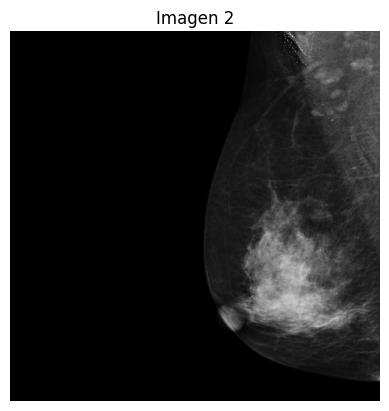

In [4]:
# Definir la ruta de la carpeta
folder_path = "E:/Numpys/Array/Bloques 607 Benign malign/Division/Training/Cancer"

# Seleccionar uno de los archivos para cargar
file_name = "D1-0047.npy"  # Reemplazar con el nombre de uno de tus archivos
file_path = os.path.join(folder_path, file_name)

# Cargar el array
array = np.load(file_path)

# Verificar la forma del array
print(f"Forma del array cargado: {array.shape}")

# Mostrar las imágenes contenidas en el array
num_images = array.shape[0]

for i in range(num_images):
    plt.imshow(array[i].squeeze(), cmap='gray')
    plt.title(f"Imagen {i+1}")
    plt.axis('off')
    plt.show()

# Dividir en bloques

In [7]:
# Función para copiar archivos a los directorios correspondientes según el prefijo
def copy_files_by_prefix(prefixes, source_dir, output_dir):
    for prefix in prefixes:
        # Obtener los archivos correspondientes al prefijo
        prefix_files = [file for file in os.listdir(source_dir) if file.startswith(prefix)]
        
        # Copiar los archivos a los directorios correspondientes
        for file in prefix_files:
            source_file = os.path.join(source_dir, file)
            if prefix in training_prefixes:
                destination = os.path.join(output_dir, "Training", file)
            elif prefix in validation_prefixes:
                destination = os.path.join(output_dir, "Validation", file)
            else:
                destination = os.path.join(output_dir, "Test", file)
            shutil.copy(source_file, destination)

In [13]:
# Benign
input_directory = "E:/DBT/seleccionadas/Benign"
output_directory = "E:/Bloques/Division"

# Crear directorios de Training, Validation y Test si no existen
for division in ["Training", "Validation", "Test"]:
    division_dir = os.path.join(output_directory, division)
    if not os.path.exists(division_dir):
        os.makedirs(division_dir)

# Obtener la lista de archivos npy en el directorio de entrada
npy_files = [f for f in os.listdir(input_directory) if f.endswith('.npy')]

# Crear una lista para almacenar los prefijos de las imágenes
image_prefixes = []
for npy_file in npy_files:
    #file_name = os.path.splitext(npy_file)[0]  # Obtener el nombre del archivo sin la extensión .npy
    image_prefixes.append(npy_file)

# Mostrar los prefijos guardados por pantalla
# print("Prefijos de las imágenes:")
# for prefix in image_prefixes:
#     print(prefix)

# Mostrar la cantidad total de prefijos
total_prefixes = len(image_prefixes)
print("Cantidad total de prefijos:", total_prefixes)

# Determinar la cantidad de prefijos para cada conjunto (Training, Validation, Test)
num_prefixes = len(image_prefixes)
num_training_prefixes = int(0.6 * num_prefixes)  # 70% para Training
num_validation_prefixes = int(0.2 * num_prefixes)  # 15% para Validation
num_test_prefixes = num_prefixes - num_training_prefixes - num_validation_prefixes  # El resto para Test

# Imprimir la cantidad de prefijos para cada conjunto
print("Cantidad de prefijos para Training:", num_training_prefixes)
print("Cantidad de prefijos para Validation:", num_validation_prefixes)
print("Cantidad de prefijos para Test:", num_test_prefixes)

# Seleccionar aleatoriamente los prefijos para cada conjunto
random.shuffle(image_prefixes)
training_prefixes = image_prefixes[:num_training_prefixes]
validation_prefixes = image_prefixes[num_training_prefixes:num_training_prefixes + num_validation_prefixes]
test_prefixes = image_prefixes[num_training_prefixes + num_validation_prefixes:]

# Mostrar los prefijos seleccionados para cada conjunto por pantalla
# print("Prefijos seleccionados para Training:")
# for prefix in training_prefixes:
#     print(prefix)
# print("Prefijos seleccionados para Validation:")
# for prefix in validation_prefixes:
#     print(prefix)
# print("Prefijos seleccionados para Test:")
# for prefix in test_prefixes:
#     print(prefix)

# Copiar archivos por prefijo para Training, Validation y Test
files_directory = os.path.join(output_directory, "Training/Benign")
for prefix in training_prefixes:
    source_file = os.path.join(input_directory, prefix)
    destination = os.path.join(files_directory, prefix)
    shutil.copy(source_file, destination)

print("Training completado.")
files_directory = os.path.join(output_directory, "Validation/Benign")
for prefix in validation_prefixes:
    source_file = os.path.join(input_directory, prefix)
    destination = os.path.join(files_directory, prefix)
    shutil.copy(source_file, destination)
    
print("Validation completado.")
files_directory = os.path.join(output_directory, "Test/Benign")
for prefix in test_prefixes:
    source_file = os.path.join(input_directory, prefix)
    destination = os.path.join(files_directory, prefix)
    shutil.copy(source_file, destination)
    
print("Test completado.")

print("Proceso completado.")

Cantidad total de prefijos: 280
Cantidad de prefijos para Training: 168
Cantidad de prefijos para Validation: 56
Cantidad de prefijos para Test: 56
Training completado.
Validation completado.
Test completado.
Proceso completado.


In [14]:
# Actionable
input_directory = "E:/DBT/seleccionadas/Actionable"
output_directory = "E:/Bloques/Division"

# Crear directorios de Training, Validation y Test si no existen
for division in ["Training", "Validation", "Test"]:
    division_dir = os.path.join(output_directory, division)
    if not os.path.exists(division_dir):
        os.makedirs(division_dir)

# Obtener la lista de archivos npy en el directorio de entrada
npy_files = [f for f in os.listdir(input_directory) if f.endswith('.npy')]

# Crear una lista para almacenar los prefijos de las imágenes
image_prefixes = []
for npy_file in npy_files:
    #file_name = os.path.splitext(npy_file)[0]  # Obtener el nombre del archivo sin la extensión .npy
    image_prefixes.append(npy_file)

# Mostrar los prefijos guardados por pantalla
# print("Prefijos de las imágenes:")
# for prefix in image_prefixes:
#     print(prefix)

# Mostrar la cantidad total de prefijos
total_prefixes = len(image_prefixes)
print("Cantidad total de prefijos:", total_prefixes)

# Determinar la cantidad de prefijos para cada conjunto (Training, Validation, Test)
num_prefixes = len(image_prefixes)
num_training_prefixes = int(0.6 * num_prefixes)  # 70% para Training
num_validation_prefixes = int(0.2 * num_prefixes)  # 15% para Validation
num_test_prefixes = num_prefixes - num_training_prefixes - num_validation_prefixes  # El resto para Test

# Imprimir la cantidad de prefijos para cada conjunto
print("Cantidad de prefijos para Training:", num_training_prefixes)
print("Cantidad de prefijos para Validation:", num_validation_prefixes)
print("Cantidad de prefijos para Test:", num_test_prefixes)

# Seleccionar aleatoriamente los prefijos para cada conjunto
random.shuffle(image_prefixes)
training_prefixes = image_prefixes[:num_training_prefixes]
validation_prefixes = image_prefixes[num_training_prefixes:num_training_prefixes + num_validation_prefixes]
test_prefixes = image_prefixes[num_training_prefixes + num_validation_prefixes:]

# Mostrar los prefijos seleccionados para cada conjunto por pantalla
# print("Prefijos seleccionados para Training:")
# for prefix in training_prefixes:
#     print(prefix)
# print("Prefijos seleccionados para Validation:")
# for prefix in validation_prefixes:
#     print(prefix)
# print("Prefijos seleccionados para Test:")
# for prefix in test_prefixes:
#     print(prefix)

# Copiar archivos por prefijo para Training, Validation y Test
files_directory = os.path.join(output_directory, "Training/Actionable")
for prefix in training_prefixes:
    source_file = os.path.join(input_directory, prefix)
    destination = os.path.join(files_directory, prefix)
    shutil.copy(source_file, destination)

print("Training completado.")
files_directory = os.path.join(output_directory, "Validation/Actionable")
for prefix in validation_prefixes:
    source_file = os.path.join(input_directory, prefix)
    destination = os.path.join(files_directory, prefix)
    shutil.copy(source_file, destination)
    
print("Validation completado.")
files_directory = os.path.join(output_directory, "Test/Actionable")
for prefix in test_prefixes:
    source_file = os.path.join(input_directory, prefix)
    destination = os.path.join(files_directory, prefix)
    shutil.copy(source_file, destination)
    
print("Test completado.")

print("Proceso completado.")

Cantidad total de prefijos: 280
Cantidad de prefijos para Training: 168
Cantidad de prefijos para Validation: 56
Cantidad de prefijos para Test: 56
Training completado.
Validation completado.
Test completado.
Proceso completado.


In [16]:
# Cancer
input_directory = "E:/DBT/seleccionadas/Cancer"
output_directory = "E:/Bloques/Division"

# Crear directorios de Training, Validation y Test si no existen
for division in ["Training", "Validation", "Test"]:
    division_dir = os.path.join(output_directory, division)
    if not os.path.exists(division_dir):
        os.makedirs(division_dir)

# Obtener la lista de archivos npy en el directorio de entrada
npy_files = [f for f in os.listdir(input_directory) if f.endswith('.npy')]

# Crear una lista para almacenar los prefijos de las imágenes
image_prefixes = []
for npy_file in npy_files:
    #file_name = os.path.splitext(npy_file)[0]  # Obtener el nombre del archivo sin la extensión .npy
    image_prefixes.append(npy_file)

# Mostrar los prefijos guardados por pantalla
# print("Prefijos de las imágenes:")
# for prefix in image_prefixes:
#     print(prefix)

# Mostrar la cantidad total de prefijos
total_prefixes = len(image_prefixes)
print("Cantidad total de prefijos:", total_prefixes)

# Determinar la cantidad de prefijos para cada conjunto (Training, Validation, Test)
num_prefixes = len(image_prefixes)
num_training_prefixes = int(0.6 * num_prefixes)  # 70% para Training
num_validation_prefixes = int(0.2 * num_prefixes)  # 15% para Validation
num_test_prefixes = num_prefixes - num_training_prefixes - num_validation_prefixes  # El resto para Test

# Imprimir la cantidad de prefijos para cada conjunto
print("Cantidad de prefijos para Training:", num_training_prefixes)
print("Cantidad de prefijos para Validation:", num_validation_prefixes)
print("Cantidad de prefijos para Test:", num_test_prefixes)

# Seleccionar aleatoriamente los prefijos para cada conjunto
random.shuffle(image_prefixes)
training_prefixes = image_prefixes[:num_training_prefixes]
validation_prefixes = image_prefixes[num_training_prefixes:num_training_prefixes + num_validation_prefixes]
test_prefixes = image_prefixes[num_training_prefixes + num_validation_prefixes:]

# Mostrar los prefijos seleccionados para cada conjunto por pantalla
# print("Prefijos seleccionados para Training:")
# for prefix in training_prefixes:
#     print(prefix)
# print("Prefijos seleccionados para Validation:")
# for prefix in validation_prefixes:
#     print(prefix)
# print("Prefijos seleccionados para Test:")
# for prefix in test_prefixes:
#     print(prefix)

# Copiar archivos por prefijo para Training, Validation y Test
files_directory = os.path.join(output_directory, "Training/Cancer")
for prefix in training_prefixes:
    source_file = os.path.join(input_directory, prefix)
    destination = os.path.join(files_directory, prefix)
    shutil.copy(source_file, destination)

print("Training completado.")
files_directory = os.path.join(output_directory, "Validation/Cancer")
for prefix in validation_prefixes:
    source_file = os.path.join(input_directory, prefix)
    destination = os.path.join(files_directory, prefix)
    shutil.copy(source_file, destination)
    
print("Validation completado.")
files_directory = os.path.join(output_directory, "Test/Cancer")
for prefix in test_prefixes:
    source_file = os.path.join(input_directory, prefix)
    destination = os.path.join(files_directory, prefix)
    shutil.copy(source_file, destination)
    
print("Test completado.")

print("Proceso completado.")

Cantidad total de prefijos: 280
Cantidad de prefijos para Training: 168
Cantidad de prefijos para Validation: 56
Cantidad de prefijos para Test: 56
Training completado.
Validation completado.
Test completado.
Proceso completado.


In [15]:
# Normal
input_directory = "E:/DBT/seleccionadas/Normal"
output_directory = "E:/Bloques/Division"

# Crear directorios de Training, Validation y Test si no existen
for division in ["Training", "Validation", "Test"]:
    division_dir = os.path.join(output_directory, division)
    if not os.path.exists(division_dir):
        os.makedirs(division_dir)

# Obtener la lista de archivos npy en el directorio de entrada
npy_files = [f for f in os.listdir(input_directory) if f.endswith('.npy')]

# Crear una lista para almacenar los prefijos de las imágenes
image_prefixes = []
for npy_file in npy_files:
    #file_name = os.path.splitext(npy_file)[0]  # Obtener el nombre del archivo sin la extensión .npy
    image_prefixes.append(npy_file)

# Mostrar los prefijos guardados por pantalla
# print("Prefijos de las imágenes:")
# for prefix in image_prefixes:
#     print(prefix)

# Mostrar la cantidad total de prefijos
total_prefixes = len(image_prefixes)
print("Cantidad total de prefijos:", total_prefixes)

# Determinar la cantidad de prefijos para cada conjunto (Training, Validation, Test)
num_prefixes = len(image_prefixes)
num_training_prefixes = int(0.6 * num_prefixes)  # 70% para Training
num_validation_prefixes = int(0.2 * num_prefixes)  # 15% para Validation
num_test_prefixes = num_prefixes - num_training_prefixes - num_validation_prefixes  # El resto para Test

# Imprimir la cantidad de prefijos para cada conjunto
print("Cantidad de prefijos para Training:", num_training_prefixes)
print("Cantidad de prefijos para Validation:", num_validation_prefixes)
print("Cantidad de prefijos para Test:", num_test_prefixes)

# Seleccionar aleatoriamente los prefijos para cada conjunto
random.shuffle(image_prefixes)
training_prefixes = image_prefixes[:num_training_prefixes]
validation_prefixes = image_prefixes[num_training_prefixes:num_training_prefixes + num_validation_prefixes]
test_prefixes = image_prefixes[num_training_prefixes + num_validation_prefixes:]

# Mostrar los prefijos seleccionados para cada conjunto por pantalla
# print("Prefijos seleccionados para Training:")
# for prefix in training_prefixes:
#     print(prefix)
# print("Prefijos seleccionados para Validation:")
# for prefix in validation_prefixes:
#     print(prefix)
# print("Prefijos seleccionados para Test:")
# for prefix in test_prefixes:
#     print(prefix)

# Copiar archivos por prefijo para Training, Validation y Test
files_directory = os.path.join(output_directory, "Training/Normal")
for prefix in training_prefixes:
    source_file = os.path.join(input_directory, prefix)
    destination = os.path.join(files_directory, prefix)
    shutil.copy(source_file, destination)

print("Training completado.")
files_directory = os.path.join(output_directory, "Validation/Normal")
for prefix in validation_prefixes:
    source_file = os.path.join(input_directory, prefix)
    destination = os.path.join(files_directory, prefix)
    shutil.copy(source_file, destination)
    
print("Validation completado.")
files_directory = os.path.join(output_directory, "Test/Normal")
for prefix in test_prefixes:
    source_file = os.path.join(input_directory, prefix)
    destination = os.path.join(files_directory, prefix)
    shutil.copy(source_file, destination)
    
print("Test completado.")

print("Proceso completado.")

Cantidad total de prefijos: 400
Cantidad de prefijos para Training: 240
Cantidad de prefijos para Validation: 80
Cantidad de prefijos para Test: 80
Training completado.
Validation completado.
Test completado.
Proceso completado.


# Data Augmentation

In [5]:
def flip_image_horizontal(image):
    """
    Flips an image horizontally.
    """
    flipped_image = cv2.flip(image, 1)
    return flipped_image

def flip_image_vertical(image):
    """
    Flips an image vertically.
    """
    flipped_image = cv2.flip(image, 0)
    return flipped_image
def rotate_image_90(image, times=1):
    """
    Rotates an image by 90 degrees clockwise.
    """
    rotated_image = image.copy()
    for _ in range(times):
        rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
    return rotated_image

In [ ]:
# Ejemplo de uso:
# Cargar el archivo .npy
file_path = 'E:/NumpysTotal/Normal/DBT-S00034_DBT-P01371.npy'
images = np.load(file_path)

# Generar todas las combinaciones posibles de transformaciones
transformations = [
    (0, 0, 0),  # No transformation
    (1, 0, 0),  # Rotación de 90 grados
    (2, 0, 0),  # Rotación de 180 grados
    (3, 0, 0),  # Rotación de 270 grados
    (0, 1, 0),  # Volteo horizontal
    (0, 0, 1),  # Volteo vertical
    (1, 1, 0),  # Rotación de 90 grados + Volteo horizontal
    (1, 0, 1),  # Rotación de 90 grados + Volteo vertical
    (2, 1, 0),  # Rotación de 180 grados + Volteo horizontal
    (2, 0, 1),  # Rotación de 180 grados + Volteo vertical
    (3, 1, 0),  # Rotación de 270 grados + Volteo horizontal
    (3, 0, 1),  # Rotación de 270 grados + Volteo vertical
]

# Aplicar las transformaciones a cada imagen y guardar en un nuevo archivo .npy
for index, original_image in enumerate(images):
    for rotation, horizontal_flip, vertical_flip in transformations:
        transformed_image = original_image.copy()
        transformed_image = rotate_image_90(transformed_image, times=rotation)
        if horizontal_flip:
            transformed_image = flip_image_horizontal(transformed_image)
        if vertical_flip:
            transformed_image = flip_image_vertical(transformed_image)
    
        # Guardar las imágenes transformadas en un nuevo archivo .npy
        output_file_path = f'resultados/transformada/imagen_{index}_{rotation}{horizontal_flip}{vertical_flip}.jpg'
        cv2.imwrite(output_file_path, transformed_image)
print(f'Imágenes transformadas de la imagen {index} guardadas en resultados/transformada/imagen')

In [7]:
# Test:
pathNumpy = "E:/Numpys/Array/Bloques 607 Benign malign/Division/Test"
pathNumpySave = "E:/Numpys/Array/Bloques 607 Benign malign/DataAugmentation/Test"

transformations = [
    (0, 0, 0),  # No transformation
    (1, 0, 0),  # Rotación de 90 grados
    (2, 0, 0),  # Rotación de 180 grados
    (3, 0, 0),  # Rotación de 270 grados
    (0, 1, 0),  # Volteo horizontal
    (0, 0, 1),  # Volteo vertical
    (1, 1, 0),  # Rotación de 90 grados + Volteo horizontal
    (1, 0, 1),  # Rotación de 90 grados + Volteo vertical
    (2, 1, 0),  # Rotación de 180 grados + Volteo horizontal
    (2, 0, 1),  # Rotación de 180 grados + Volteo vertical
    (3, 1, 0),  # Rotación de 270 grados + Volteo horizontal
    (3, 0, 1),  # Rotación de 270 grados + Volteo vertical
]

contenido = os.listdir(pathNumpy)
carpetas = [elemento for elemento in contenido if os.path.isdir(os.path.join(pathNumpy, elemento))]
for carpeta in carpetas:
    for filename in os.listdir(os.path.join(pathNumpy,carpeta)):
        if filename.endswith(".npy"):
            original_filename = os.path.splitext(os.path.basename(filename))[0] # Nombre del archivo original sin la extensión
            image = np.load(os.path.join(pathNumpy, carpeta, filename))
            # Aplicar las transformaciones a cada imagen y guardar en un nuevo archivo .npy
            for rotation, horizontal_flip, vertical_flip in transformations:
                output_file_path =os.path.join(f"{pathNumpySave}/{carpeta}", f'{original_filename}transformed{rotation}{horizontal_flip}{vertical_flip}.npy') 
                if not os.path.exists(output_file_path):
                    transformed_image = image.copy()
                    transformed_image = rotate_image_90(transformed_image, times=rotation)
                    if horizontal_flip:
                        transformed_image = flip_image_horizontal(transformed_image)
                    if vertical_flip:
                        transformed_image = flip_image_vertical(transformed_image)
                    # Guardar las imágenes transformadas en un nuevo archivo .npy
                    np.save(output_file_path, transformed_image)
                
        print(f"Calculando: {filename} con shape {transformed_image.shape}", end='\r')

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\matrix_transform.cpp:1104: error: (-215:Assertion failed) _src.dims() <= 2 in function 'cv::rotate'


In [6]:
# Training:
pathNumpy = "E:/Numpys/Bloques/Division/Training"
pathNumpySave = "E:/Numpys/Bloques/DataAugmentation/Training"

transformations = [
    (0, 0, 0),  # No transformation
    (1, 0, 0),  # Rotación de 90 grados
    (2, 0, 0),  # Rotación de 180 grados
    (3, 0, 0),  # Rotación de 270 grados
    (0, 1, 0),  # Volteo horizontal
    (0, 0, 1),  # Volteo vertical
    (1, 1, 0),  # Rotación de 90 grados + Volteo horizontal
    (1, 0, 1),  # Rotación de 90 grados + Volteo vertical
    (2, 1, 0),  # Rotación de 180 grados + Volteo horizontal
    (2, 0, 1),  # Rotación de 180 grados + Volteo vertical
    (3, 1, 0),  # Rotación de 270 grados + Volteo horizontal
    (3, 0, 1),  # Rotación de 270 grados + Volteo vertical
]

contenido = os.listdir(pathNumpy)
carpetas = [elemento for elemento in contenido if os.path.isdir(os.path.join(pathNumpy, elemento))]
for carpeta in carpetas:
    for filename in os.listdir(os.path.join(pathNumpy,carpeta)):
        if filename.endswith(".npy"):
            original_filename = os.path.splitext(os.path.basename(filename))[0] # Nombre del archivo original sin la extensión
            image = np.load(os.path.join(pathNumpy, carpeta, filename))
            # Aplicar las transformaciones a cada imagen y guardar en un nuevo archivo .npy
            for rotation, horizontal_flip, vertical_flip in transformations:
                output_file_path =os.path.join(f"{pathNumpySave}/{carpeta}", f'{original_filename}transformed{rotation}{horizontal_flip}{vertical_flip}.npy') 
                if not os.path.exists(output_file_path):
                    transformed_image = image.copy()
                    transformed_image = rotate_image_90(transformed_image, times=rotation)
                    if horizontal_flip:
                        transformed_image = flip_image_horizontal(transformed_image)
                    if vertical_flip:
                        transformed_image = flip_image_vertical(transformed_image)
                    # Guardar las imágenes transformadas en un nuevo archivo .npy
                    np.save(output_file_path, transformed_image)
                
        print(f"Calculando: {filename} con shape {transformed_image.shape}", end='\r')

In [8]:
# Validation:
pathNumpy = "E:/Numpys/Bloques/Division/Validation"
pathNumpySave = "E:/Numpys/Bloques/DataAugmentation/Validation"

transformations = [
    (0, 0, 0),  # No transformation
    (1, 0, 0),  # Rotación de 90 grados
    (2, 0, 0),  # Rotación de 180 grados
    (3, 0, 0),  # Rotación de 270 grados
    (0, 1, 0),  # Volteo horizontal
    (0, 0, 1),  # Volteo vertical
    (1, 1, 0),  # Rotación de 90 grados + Volteo horizontal
    (1, 0, 1),  # Rotación de 90 grados + Volteo vertical
    (2, 1, 0),  # Rotación de 180 grados + Volteo horizontal
    (2, 0, 1),  # Rotación de 180 grados + Volteo vertical
    (3, 1, 0),  # Rotación de 270 grados + Volteo horizontal
    (3, 0, 1),  # Rotación de 270 grados + Volteo vertical
]

contenido = os.listdir(pathNumpy)
carpetas = [elemento for elemento in contenido if os.path.isdir(os.path.join(pathNumpy, elemento))]
for carpeta in carpetas:
    for filename in os.listdir(os.path.join(pathNumpy,carpeta)):
        if filename.endswith(".npy"):
            original_filename = os.path.splitext(os.path.basename(filename))[0] # Nombre del archivo original sin la extensión
            image = np.load(os.path.join(pathNumpy, carpeta, filename))
            # Aplicar las transformaciones a cada imagen y guardar en un nuevo archivo .npy
            for rotation, horizontal_flip, vertical_flip in transformations:
                output_file_path =os.path.join(f"{pathNumpySave}/{carpeta}", f'{original_filename}transformed{rotation}{horizontal_flip}{vertical_flip}.npy') 
                if not os.path.exists(output_file_path):
                    transformed_image = image.copy()
                    transformed_image = rotate_image_90(transformed_image, times=rotation)
                    if horizontal_flip:
                        transformed_image = flip_image_horizontal(transformed_image)
                    if vertical_flip:
                        transformed_image = flip_image_vertical(transformed_image)
                    # Guardar las imágenes transformadas en un nuevo archivo .npy
                    np.save(output_file_path, transformed_image)
                
        print(f"Calculando: {filename} con shape {transformed_image.shape}", end='\r')